In [ ]:
import numpy as np
import numpy.typing as npt

from bear_marriage.data import ColoredPoint

def color_points(points: npt.NDArray[np.float32], black: bool):
    return [ColoredPoint(x, y, black) for x, y in points.tolist()]


def sample_data(n: int, seed: int | None = 0) -> list[ColoredPoint]:
    if seed is not None:
        np.random.seed(seed)
    all_points = np.random.uniform(-1, 1, size=(2 * n, 2))
    blacks, whites = all_points[:n], all_points[n:]
    return color_points(blacks, black=True) + color_points(whites, black=False)

In [ ]:
points = sample_data(n=50)

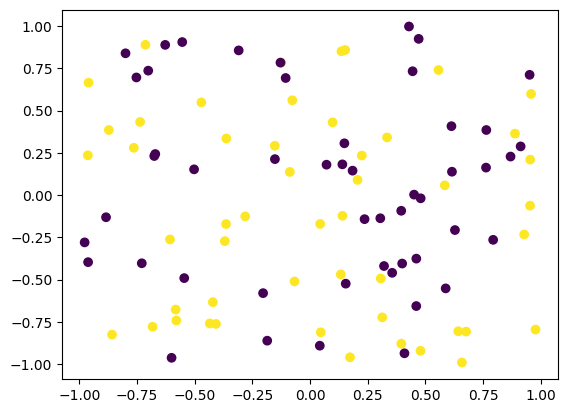

In [ ]:
from bear_marriage.plotting_utils import plot_points

plot_points(points)

In [ ]:
from bear_marriage.find_pairs import connect_points


pairs = connect_points(points)

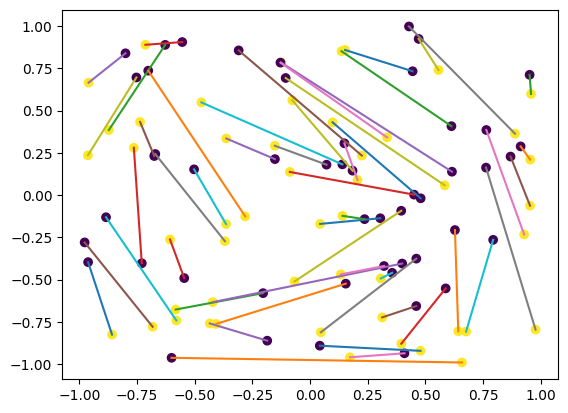

In [ ]:
from bear_marriage.plotting_utils import plot_pairs

plot_pairs(pairs)
plot_points(points)

In [ ]:
import matplotlib.pyplot as plt

def generate_single_example(n: int):
    points = sample_data(n, seed=None)
    pairs = connect_points(points)
    plot_points(points)
    plot_pairs(pairs)
    plt.show()

In [18]:
def generate_examples(n_list: list[int]):
    for n in n_list:
        points = sample_data(n, seed=None)
        pairs = connect_points(points)
        plot_points(points)
        plot_pairs(pairs)
        plt.show()

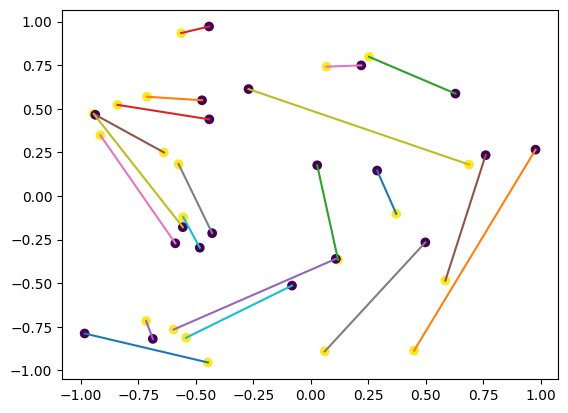

In [90]:
generate_single_example(n=20)

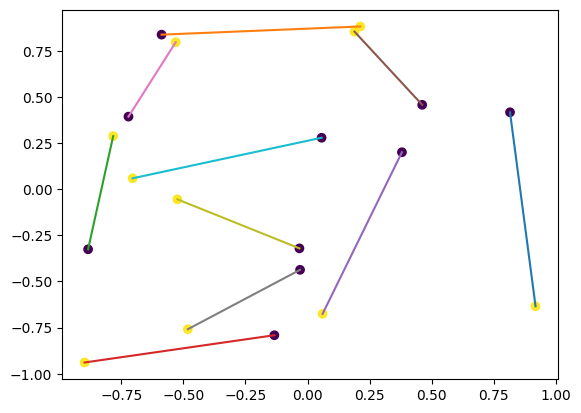

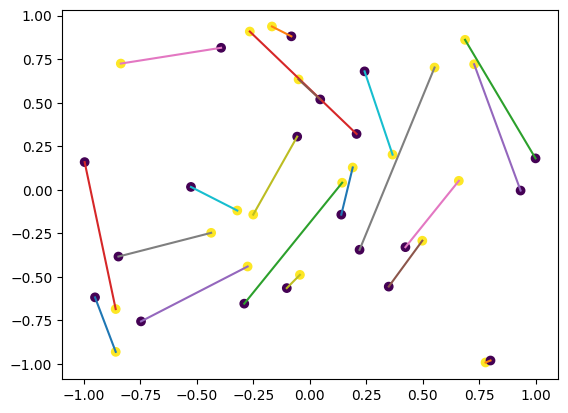

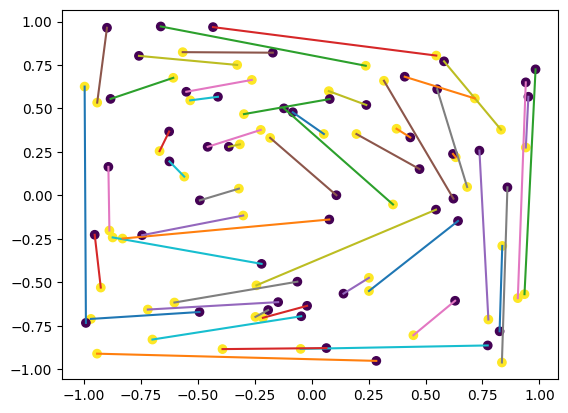

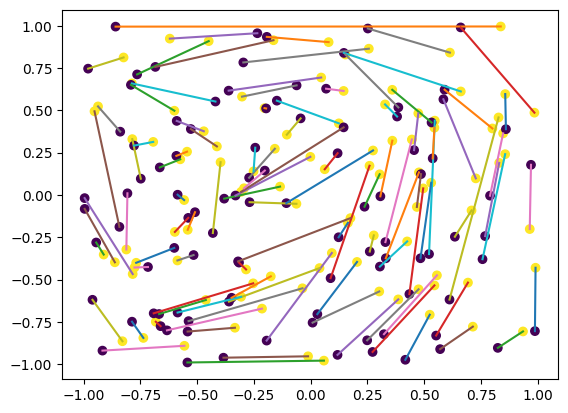

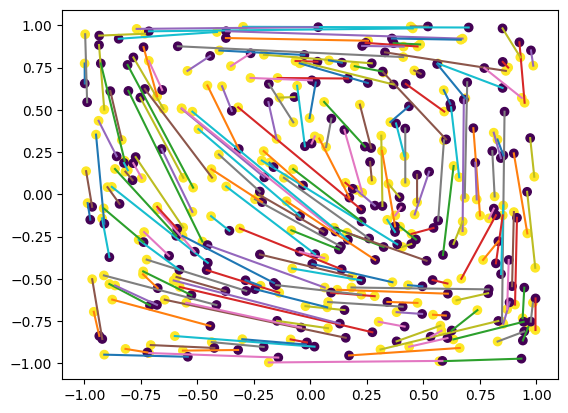

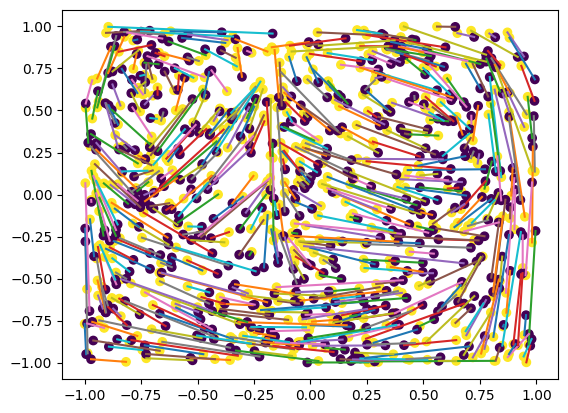

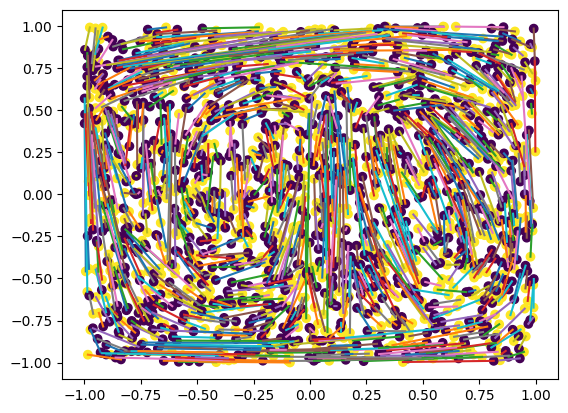

In [91]:
generate_examples(n_list=[10, 20, 50, 100, 200, 500, 1000])

In [15]:
from bear_marriage.data import ColoredPoint
from pathlib import Path


def read_points(path: str) -> list[ColoredPoint]:
    with Path(path).open() as file:
        lines = file.readlines()
    del lines[0]  # header
    res = []
    for line in lines:
        if len(line.strip()) == 0:
            continue
        _, x, y, black = line.split()
        res.append(ColoredPoint(float(x), float(y), black == "1"))
    return res

io_points = read_points("data/3333_float.txt")

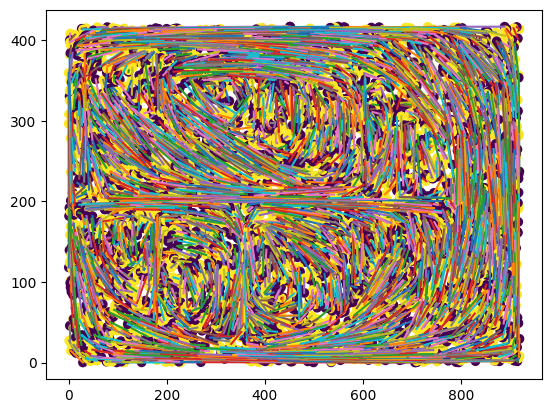

In [16]:
from bear_marriage.find_pairs import connect_points
from bear_marriage.plotting_utils import plot_pairs

fig = plot_pairs(connect_points(io_points))